In [1]:
airlines = read.csv("AirlinesCluster.csv")

In [2]:
summary(airlines)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

In [3]:
library(caret)
preproc = preProcess(airlines)
airlinesNorm = predict(preproc, airlines)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
“replacing previous import by ‘plyr::ddply’ when loading ‘caret’”Warning message:
“replacing previous import by ‘tibble::as_tibble’ when loading ‘broom’”Warning message:
“replacing previous import by ‘tibble::tibble’ when loading ‘broom’”Warning message:
“replacing previous import by ‘rlang::!!’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::expr’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::f_lhs’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::f_rhs’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::invoke’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::is_empty’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::lang’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::na_dbl’ when loading ‘recipe

In [4]:
summary(airlinesNorm)

    Balance          QualMiles         BonusMiles        BonusTrans      
 Min.   :-0.7303   Min.   :-0.1863   Min.   :-0.7099   Min.   :-1.20805  
 1st Qu.:-0.5465   1st Qu.:-0.1863   1st Qu.:-0.6581   1st Qu.:-0.89568  
 Median :-0.3027   Median :-0.1863   Median :-0.4130   Median : 0.04145  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1866   3rd Qu.:-0.1863   3rd Qu.: 0.2756   3rd Qu.: 0.56208  
 Max.   :16.1868   Max.   :14.2231   Max.   :10.2083   Max.   : 7.74673  
  FlightMiles       FlightTrans       DaysSinceEnroll   
 Min.   :-0.3286   Min.   :-0.36212   Min.   :-1.99336  
 1st Qu.:-0.3286   1st Qu.:-0.36212   1st Qu.:-0.86607  
 Median :-0.3286   Median :-0.36212   Median :-0.01092  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1065   3rd Qu.:-0.09849   3rd Qu.: 0.80960  
 Max.   :21.6803   Max.   :13.61035   Max.   : 2.02284  

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


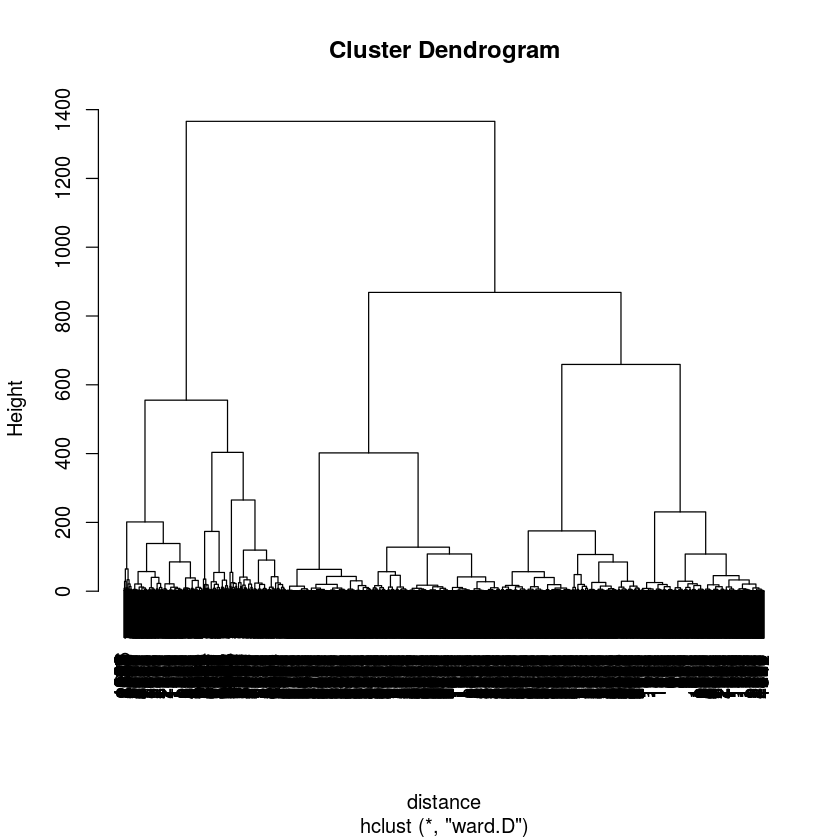

In [5]:
# Compute distances
distance = dist(airlinesNorm, method = "euclidean")
# Hierarchical clustering
clusterIntensity = hclust(distance, method="ward")
plot(clusterIntensity)

In [6]:
airlineClusters = cutree(clusterIntensity, k = 5)
hierCluster1 = subset(airlines, airlineClusters == 1)
hierCluster2 = subset(airlines, airlineClusters == 2)
hierCluster3 = subset(airlines, airlineClusters == 3)
hierCluster4 = subset(airlines, airlineClusters == 4)
hierCluster5 = subset(airlines, airlineClusters == 5)

In [7]:
nrow(hierCluster1)

[1] 776

In [10]:
tapply(airlines$Balance, airlineClusters, mean)
tapply(airlines$QualMiles, airlineClusters, mean)
tapply(airlines$BonusMiles, airlineClusters, mean)
tapply(airlines$BonusTrans, airlineClusters, mean)
tapply(airlines$FlightMiles, airlineClusters, mean)
tapply(airlines$FlightTrans, airlineClusters, mean)
tapply(airlines$DaysSinceEnroll, airlineClusters, mean)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1         2         3         4         5 
 57866.90 110669.27 198191.57  52335.91  36255.91

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1            2            3            4            5 
   0.6443299 1065.9826590   30.3461538    4.8479263    2.5111773

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1         2         3         4         5 
10360.124 22881.763 55795.860 20788.766  2264.788

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1         2         3         4         5 
10.823454 18.229287 19.663968 17.087558  2.973174

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1          2          3          4          5 
  83.18428 2613.41811  327.67611  111.57373  119.32191

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1         2         3         4         5 
0.3028351 7.4026975 1.0688259 0.3444700 0.4388972

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1        2        3        4        5 
6235.365 4402.414 5615.709 2840.823 3060.081

In [12]:
summary(airlines)
summary(hierCluster1)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

    Balance         QualMiles          BonusMiles      BonusTrans   
 Min.   :   148   Min.   :  0.0000   Min.   :    0   Min.   : 0.00  
 1st Qu.: 21661   1st Qu.:  0.0000   1st Qu.: 2100   1st Qu.: 6.00  
 Median : 45426   Median :  0.0000   Median : 7322   Median :13.00  
 Mean   : 57867   Mean   :  0.6443   Mean   :10360   Mean   :10.82  
 3rd Qu.: 84803   3rd Qu.:  0.0000   3rd Qu.:16710   3rd Qu.:15.00  
 Max.   :238868   Max.   :500.0000   Max.   :49383   Max.   :31.00  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :   0.00   Min.   :0.0000   Min.   :2440   
 1st Qu.:   0.00   1st Qu.:0.0000   1st Qu.:5440   
 Median :   0.00   Median :0.0000   Median :6291   
 Mean   :  83.18   Mean   :0.3028   Mean   :6235   
 3rd Qu.:   0.00   3rd Qu.:0.0000   3rd Qu.:7162   
 Max.   :1600.00   Max.   :5.0000   Max.   :8296   

In [13]:
summary(airlines)
summary(hierCluster4)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

    Balance         QualMiles          BonusMiles      BonusTrans   
 Min.   :   329   Min.   :   0.000   Min.   :  454   Min.   : 4.00  
 1st Qu.: 23847   1st Qu.:   0.000   1st Qu.: 7720   1st Qu.:13.00  
 Median : 44210   Median :   0.000   Median :16966   Median :15.00  
 Mean   : 52336   Mean   :   4.848   Mean   :20789   Mean   :17.09  
 3rd Qu.: 71525   3rd Qu.:   0.000   3rd Qu.:29310   3rd Qu.:20.00  
 Max.   :298927   Max.   :1490.000   Max.   :89360   Max.   :50.00  
  FlightMiles      FlightTrans     DaysSinceEnroll
 Min.   :   0.0   Min.   :0.0000   Min.   : 248   
 1st Qu.:   0.0   1st Qu.:0.0000   1st Qu.:1816   
 Median :   0.0   Median :0.0000   Median :2672   
 Mean   : 111.6   Mean   :0.3445   Mean   :2841   
 3rd Qu.:   0.0   3rd Qu.:0.0000   3rd Qu.:3698   
 Max.   :3341.0   Max.   :6.0000   Max.   :7990   

In [14]:
summary(airlines)
summary(hierCluster5)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

    Balance         QualMiles          BonusMiles      BonusTrans    
 Min.   :    50   Min.   :   0.000   Min.   :    0   Min.   : 0.000  
 1st Qu.:  9508   1st Qu.:   0.000   1st Qu.:    0   1st Qu.: 0.000  
 Median : 20850   Median :   0.000   Median :  750   Median : 3.000  
 Mean   : 36256   Mean   :   2.511   Mean   : 2265   Mean   : 2.973  
 3rd Qu.: 43216   3rd Qu.:   0.000   3rd Qu.: 2550   3rd Qu.: 5.000  
 Max.   :282971   Max.   :1000.000   Max.   :24430   Max.   :18.000  
  FlightMiles      FlightTrans     DaysSinceEnroll
 Min.   :   0.0   Min.   :0.0000   Min.   :   8   
 1st Qu.:   0.0   1st Qu.:0.0000   1st Qu.:1694   
 Median :   0.0   Median :0.0000   Median :2895   
 Mean   : 119.3   Mean   :0.4389   Mean   :3060   
 3rd Qu.:   0.0   3rd Qu.:0.0000   3rd Qu.:4371   
 Max.   :2000.0   Max.   :9.0000   Max.   :7521   

In [16]:
set.seed(88)
KMC = kmeans(airlinesNorm, centers = 5, iter.max = 1000)

In [ ]:
table()